In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import plot_confusion_matrix



from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


import sys
import re
import string
import datetime
import requests


import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import pycountry
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

import string as s
from nltk.corpus import stopwords
lemmatizer=nltk.stem.WordNetLemmatizer()

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix,classification_report


import warnings
warnings.filterwarnings("ignore")

import os
from PIL import Image

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 100)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("londonsteakhouse_reviews.csv")


In [3]:
df.head()


,Unnamed: 0,title,reviews,stars
0,0,Decent lunch at London Steakhouse,Used a birthday voucher for 3 course lunch fo...,4
1,1,Disappointing,"It was a very disappointing evening, thought i...",2
2,2,overpriced and average food,Spent £75 per head for a very average meal.Sta...,2
3,3,A lovely gift,We were gifted a meal at The London Steakhouse...,5
4,4,Honest Review,Polite and Professional\nClean and Pleasant\nS...,3


In [4]:
df["reviews"][4]


'Polite and Professional\nClean and Pleasant\nSteak was chewy and tough which was a disappointment as we were in a top restaurant. \nAlthough it was part of a deal I do feel that part of a staple menu should include potatos of sorts and at...least one veg before charging for extra sides. \nWe were offered water still or sparkling which we had to pay for. \nI think I would have rather had sides and water instead of the cocktails which were included in the price .  It cost us a further £48 which was for 2 x fries , 1 x onion rings, upgrade to a rib eye & water. \nExcessive I felt .\nBe very careful when booking deals !! Read all the small print and know what you are getting otherwise a budget evening will exceed your carefully worked out budget and put a damper on the evening .☹More'

In [5]:
df.shape


(14724, 4)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14724 entries, 0 to 14723
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14724 non-null  int64 
 1   title       14724 non-null  object
 2   reviews     14724 non-null  object
 3   stars       14724 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 460.2+ KB


## EDA

In [7]:
df.stars.value_counts(normalize = True)


5    0.513515
4    0.236620
3    0.143303
2    0.066354
1    0.040206
Name: stars, dtype: float64

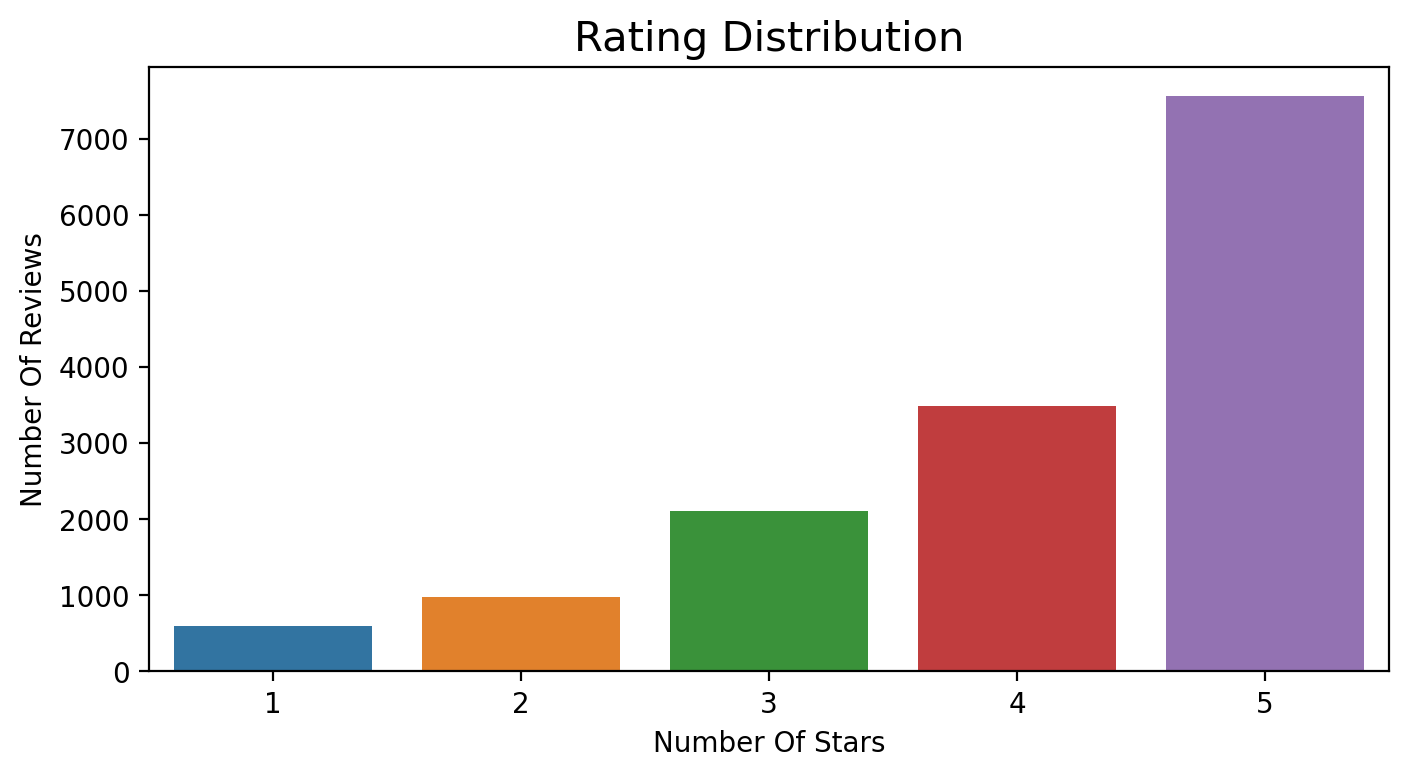

In [8]:
# Seeing rating distributions

plt.figure(figsize=(8,4),dpi=200)
sns.barplot(df.stars.value_counts().sort_values(ascending=True).index,
                 y=df.stars.value_counts().sort_values(ascending=True))

plt.title("Rating Distribution",fontsize=15)
plt.xlabel("Number Of Stars",fontsize=10)
plt.ylabel("Number Of Reviews",fontsize=10)
plt.xticks();


In [9]:
# Adding Sentiment Columns

df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] < 3, 'sentiment'] = 'negative' 
df.loc[df['stars'] > 3, 'sentiment'] = 'positive' 
df = df[["stars","sentiment","reviews"]]
df.head()


,stars,sentiment,reviews
0,4,positive,Used a birthday voucher for 3 course lunch fo...
1,2,negative,"It was a very disappointing evening, thought i..."
2,2,negative,Spent £75 per head for a very average meal.Sta...
3,5,positive,We were gifted a meal at The London Steakhouse...
4,3,neutral,Polite and Professional\nClean and Pleasant\nS...


In [10]:
pd.DataFrame(round(df.sentiment.value_counts(ascending=False, normalize=True),6))


,sentiment
positive,0.750136
neutral,0.143303
negative,0.106561


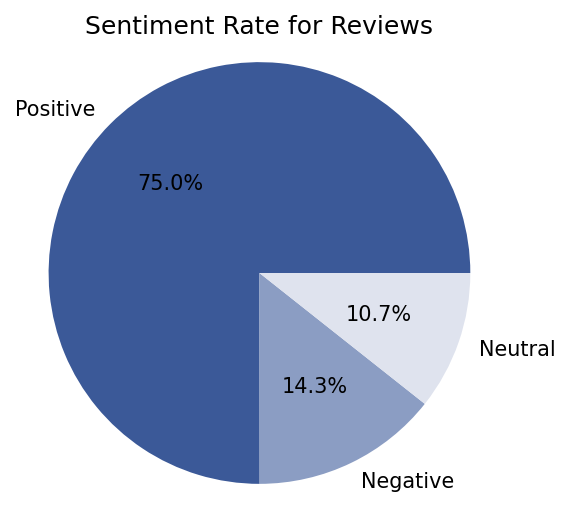

In [11]:
positive = len(df[df["sentiment"]=="positive"])
negative = len(df[df["sentiment"]=="negative"])
neutral = len(df[df["sentiment"]=="neutral"])

pie_sentiment = df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(4,4),dpi=150),
labels = 'Positive','Negative',"Neutral"
colors = ['#3B5998', '#8B9DC3','#DFE3EE']
plt.pie(pie_sentiment, colors=colors,labels=labels,autopct='%1.1f%%')
plt.style.use('default')
plt.title('Sentiment Rate for Reviews')
plt.axis('equal')
sizes = [positive, neutral, negative]
plt.show()


## Text Preprocessing

In [12]:
def preprocess(text):
  text=text.lower()
  
  text=text.replace("\n"," ")
  #removing URL
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'http?:\/\/.*[\r\n]*', '', text)

  #Replace &amp, &lt, &gt with &,<,> respectively
  text=text.replace(r'&amp;?',r'and')
  text=text.replace(r'&lt;',r'<')
  text=text.replace(r'&gt;',r'>')

  #remove hashtags
  text=re.sub(r"#[A-Za-z0-9]+","",text)   
  #remove \
  text=re.sub(r"\\ "," ",text)
 
  #remove punctuations and stop words
  stop_words=stopwords.words('english')
  tokens=nltk.word_tokenize(text)
  tokens_new=[i for i in tokens if not i in stop_words and i.isalpha()] #isalpha() method returns True if all the characters are alphabet letters
  tokens_new=[lemmatizer.lemmatize(i) for i in tokens_new]
  #remove excess whitespace
  text= ' '.join(tokens_new)
  return text


In [13]:
df["reviews"]= df["reviews"].apply(preprocess)


In [14]:
df["reviews"][4]


'polite professional clean pleasant steak chewy tough disappointment top restaurant although part deal feel part staple menu include potato sort least one veg charging extra side offered water still sparkling pay think would rather side water instead cocktail included price cost u x fry x onion ring upgrade rib eye water excessive felt careful booking deal read small print know getting otherwise budget evening exceed carefully worked budget put damper evening'

##### **BEFORE PREPROCESSING:**

> 'Polite and Professional\nClean and Pleasant\nSteak was chewy and tough which was a disappointment as we were in a top restaurant. \nAlthough it was part of a deal I do feel that part of a staple menu should include potatos of sorts and at...least one veg before charging for extra sides. \nWe were offered water still or sparkling which we had to pay for. \nI think I would have rather had sides and water instead of the cocktails which were included in the price .  It cost us a further £48 which was for 2 x fries , 1 x onion rings, upgrade to a rib eye & water. \nExcessive I felt .\nBe very careful when booking deals !! Read all the small print and know what you are getting otherwise a budget evening will exceed your carefully worked out budget and put a damper on the evening .☹More'

##### **AFTER PREPROCESSING:**

> 'polite professional clean pleasant steak chewy tough disappointment top restaurant although part deal feel part staple menu include potato sort least one veg charging extra side offered water still sparkling pay think would rather side water instead cocktail included price cost u x fry x onion ring upgrade rib eye water excessive felt careful booking deal read small print know getting otherwise budget evening exceed carefully worked budget put damper evening'

## WordClouds

In [15]:
def create_wordcloud(text):
    mask = np.array(Image.open(r"C:\Users\adnan\Desktop\my_repo\NLP_Classification\cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    path="wc.png"
    display(Image.open(path))

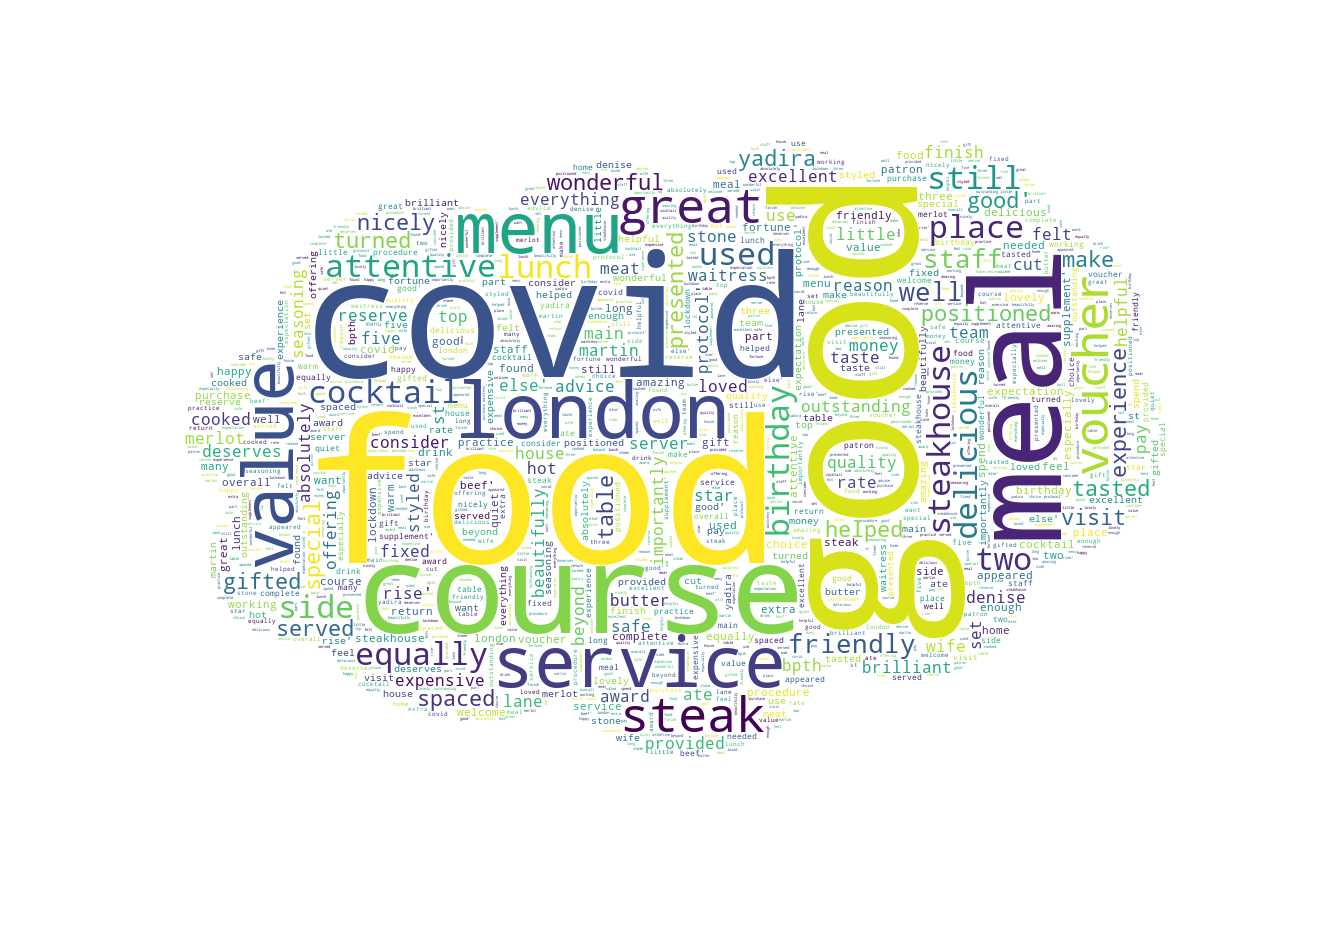

In [16]:
positive_values = df[df["sentiment"]=="positive"]
positive_values = positive_values["reviews"].values
create_wordcloud(positive_values)

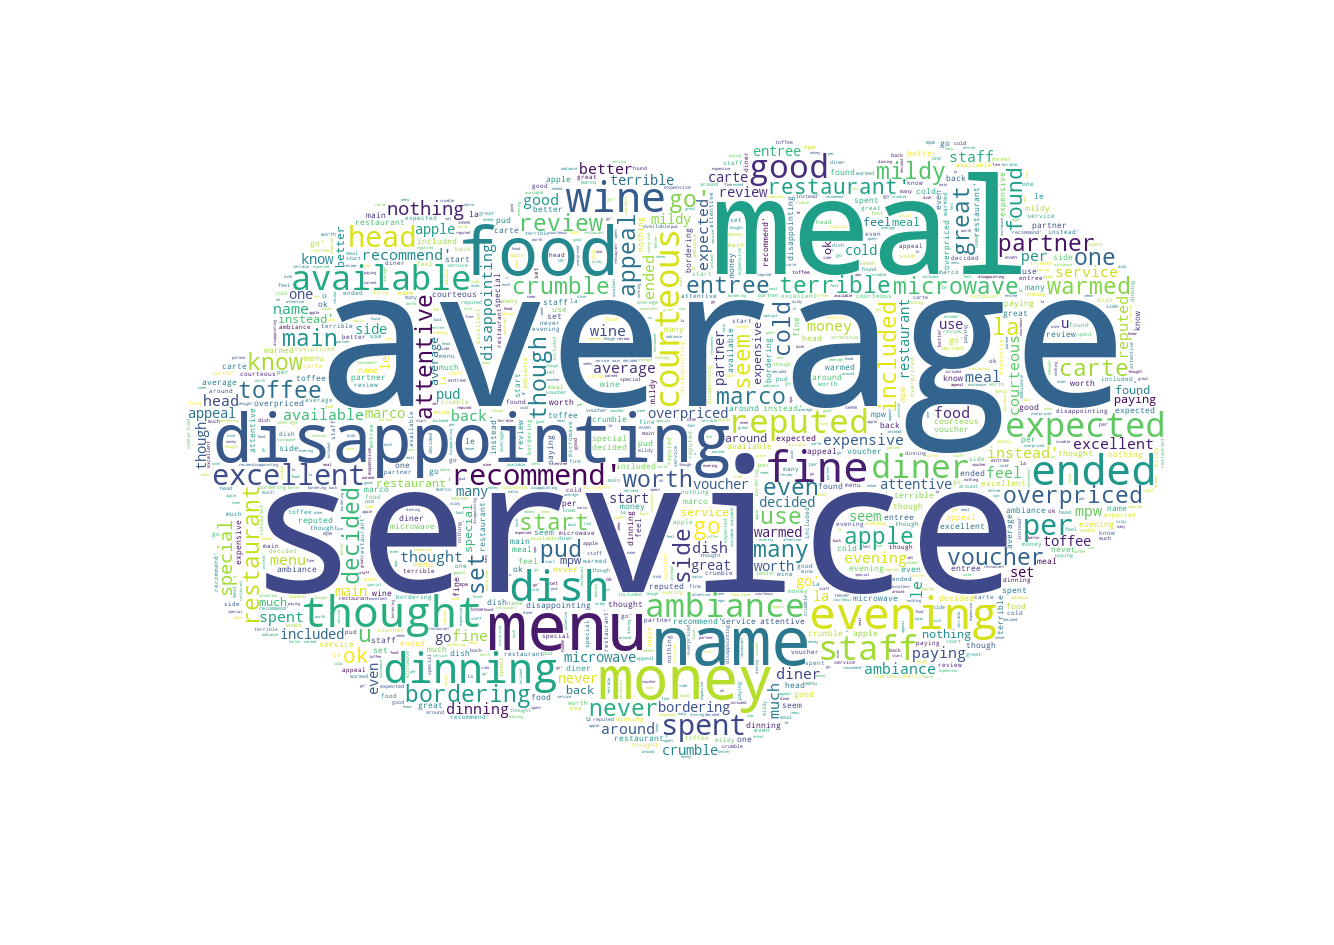

In [17]:
negative_values = df[df["sentiment"]=="negative"]
negative_values = negative_values["reviews"].values
create_wordcloud(negative_values)

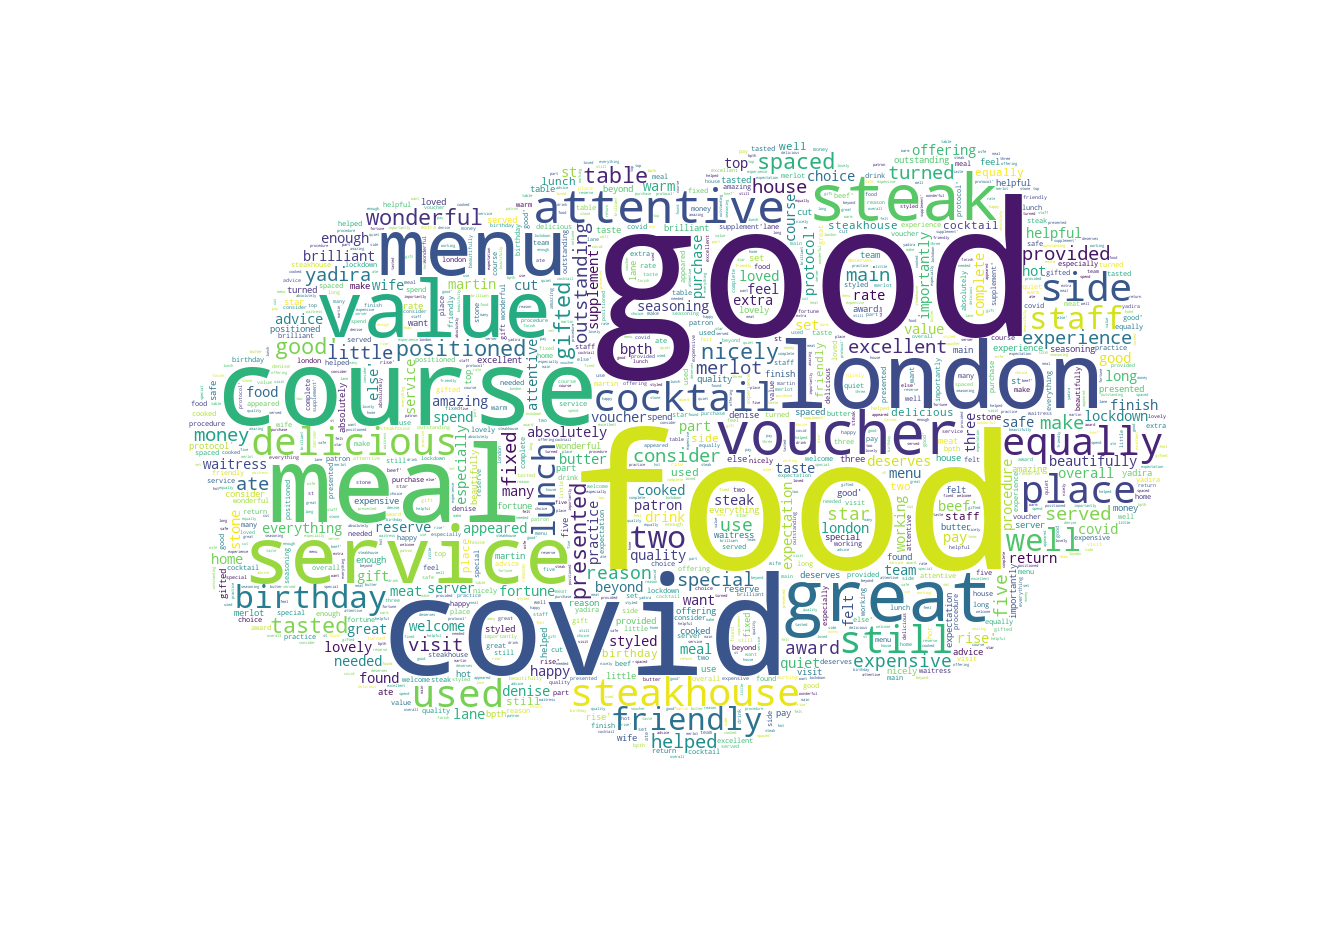

In [18]:
neutral_values = df[df["sentiment"]=="neutral"]
neutral_values = neutral_values["reviews"].values
create_wordcloud(positive_values)

## Feature Engineering

In [19]:
df.head()


,stars,sentiment,reviews
0,4,positive,used birthday voucher course lunch two friendl...
1,2,negative,disappointing evening thought would fine dinni...
2,2,negative,spent per head average service excellent food ...
3,5,positive,gifted meal london steakhouse wonderful experi...
4,3,neutral,polite professional clean pleasant steak chewy...


In [20]:
df.drop("stars", inplace = True, axis = 1)


In [21]:
df.sentiment.value_counts()


positive    11045
neutral      2110
negative     1569
Name: sentiment, dtype: int64

In [22]:
from collections import Counter
c = Counter()

# The 10 most common words

for txt in df.reviews.values:
    for word in txt.split():
        c[word] += 1
c.most_common(10)


[('food', 8003),
 ('service', 6110),
 ('staff', 4519),
 ('meal', 4467),
 ('restaurant', 4211),
 ('steak', 4170),
 ('good', 4124),
 ('experience', 3406),
 ('great', 3069),
 ('excellent', 3068)]

In [23]:
# Least 10 words
set([w for (w, wc) in c.most_common()[:-11:-1]])


{'commencing',
 'georgous',
 'herring',
 'lifeless',
 'lighty',
 'oaky',
 'ourt',
 'pototoes',
 'rebadged',
 'stunt'}

In [24]:
# Preparing data for modelling

X = df.reviews
y = df.sentiment

In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
# first method
# cv1 ,Count Vectorizer ,creating word-based matrix
cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()


,aal,aand,abc,abd,aberdeen,ability,abit,able,abroad,abrupt,abruptly,absoloutely,...,young,younger,youngest,yr,yuk,yum,yummy,zealand,zero,zone,zoo,ìt
0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# second method
# cv2, Count Vectorizer, creating it on the basis of both words and n-grams (words with 2)
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()


,aal,aal diner,aand,aand carafe,abc,abc great,abd,abd bustle,abd friendly,aberdeen,aberdeen angus,ability,...,zealand,zealand unsure,zero,zero visibility,zero weekend,zone,zone normally,zoo,zoo offer,zoo voucher,ìt,ìt good
0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


### Logistic Regression

In [28]:
# Create a logistic regression model to use
lr = LogisticRegression()


# Train the first method
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)


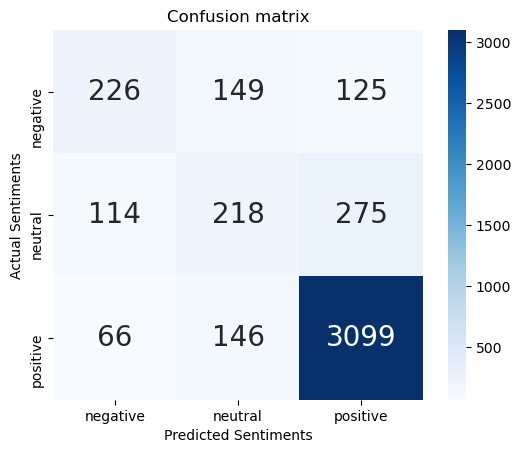

In [29]:
# Print confusion matrix
confusion = confusion_matrix(y_test, y_pred_cv1)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()


In [30]:
# Print Sklearn Metrices

accuracy = accuracy_score(y_test, y_pred_cv1)
f1 = f1_score(y_test, y_pred_cv1,average='weighted')
precision = precision_score(y_test, y_pred_cv1,average='weighted')
recall = recall_score(y_test, y_pred_cv1,average='weighted')
cm1 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


Accuracy: 80.19%
Precision: 78.51%
Recall: 80.19%
F1 Score: 79.20%


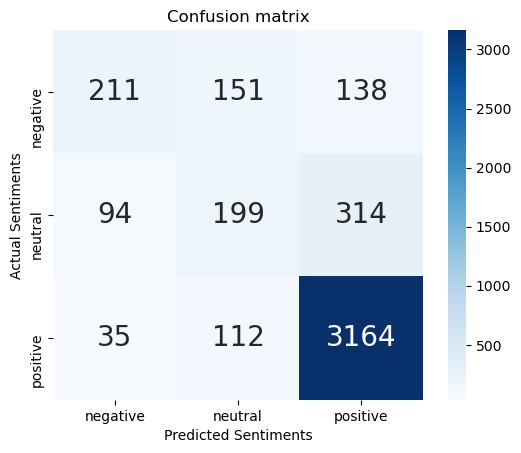

Accuracy: 80.90%
Precision: 78.52%
Recall: 80.90%
F1 Score: 79.26%


In [31]:
# Train the second method
lr = LogisticRegression()
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)


# Print confusion matrix 
confusion = confusion_matrix(y_test, y_pred_cv2)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

# Print Sklearn Metrices
accuracy = accuracy_score(y_test, y_pred_cv2)
f1 = f1_score(y_test, y_pred_cv2,average='weighted')
precision = precision_score(y_test, y_pred_cv2,average='weighted')
recall = recall_score(y_test, y_pred_cv2,average='weighted')
cm2 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


In [32]:
# creating a dataframe to compare all metric measurements
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR1-CV', 'LR2-CV-Ngr']
round(results,3)


,LR1-CV,LR2-CV-Ngr
Accuracy,0.802,0.809
Precision,0.785,0.785
Recall,0.802,0.809
F1 Score,0.792,0.793


### Naive Bayes

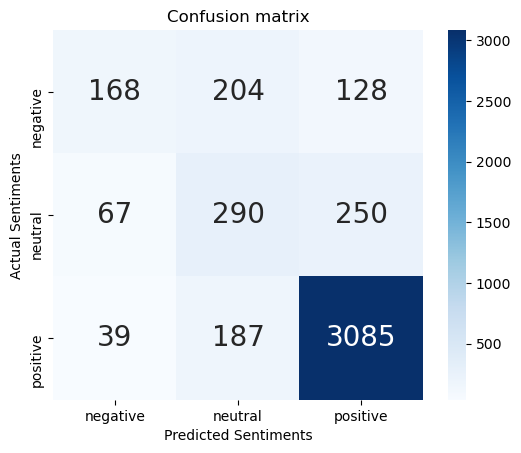

Accuracy: 80.19%
Precision: 79.55%
Recall: 80.19%
F1 Score: 79.36%


In [33]:
# Fitting the first Naive Bayes model with first method (CV1)

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)
y_pred_cv1_nb = mnb.predict(X_test_cv1)

# Print confusion matrix
confusion = confusion_matrix(y_test, y_pred_cv1_nb)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

# Print Sklearn Metrices
accuracy = accuracy_score(y_test, y_pred_cv1_nb)
f1 = f1_score(y_test, y_pred_cv1_nb,average='weighted')
precision = precision_score(y_test, y_pred_cv1_nb,average='weighted')
recall = recall_score(y_test, y_pred_cv1_nb,average='weighted')
cm3 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


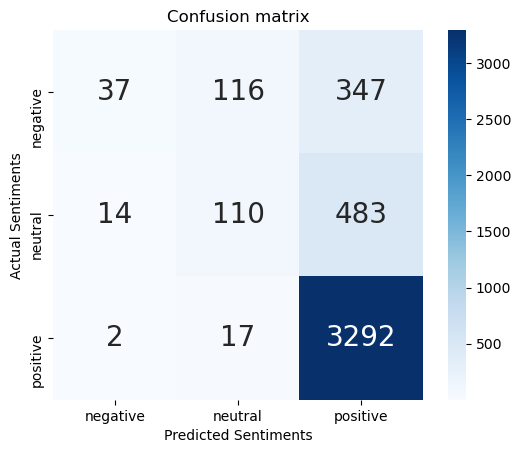

Accuracy: 77.84%
Precision: 73.97%
Recall: 77.84%
F1 Score: 71.45%


In [34]:
# Fitting the second Naive Bayes model with second method (CV2)
mnb = MultinomialNB()
mnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = mnb.predict(X_test_cv2)

confusion = confusion_matrix(y_test, y_pred_cv2_nb)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv2_nb)
f1 = f1_score(y_test, y_pred_cv2_nb,average='weighted')
precision = precision_score(y_test, y_pred_cv2_nb,average='weighted')
recall = recall_score(y_test, y_pred_cv2_nb,average='weighted')
cm4 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


In [35]:
# creating a dataframe to compare all metric measurements

results_nb = pd.DataFrame(list(zip(cm3, cm4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1-CV', 'NB2-CV-Ngr']
results_nb

results = pd.concat([results, results_nb], axis=1)
results


,LR1-CV,LR2-CV-Ngr,NB1-CV,NB2-CV-Ngr
Accuracy,0.801947,0.808963,0.801947,0.778407
Precision,0.785143,0.785169,0.795529,0.739731
Recall,0.801947,0.808963,0.801947,0.778407
F1 Score,0.792031,0.792637,0.793610,0.714538


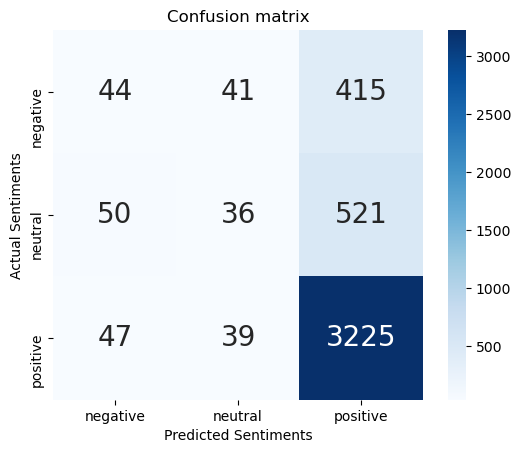

Accuracy: 74.81%
Precision: 65.88%
Recall: 74.81%
F1 Score: 67.61%


In [36]:
# Fitting the first KNN model with first method (CV1)
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv1, y_train)

y_pred_cv1_knn = knn.predict(X_test_cv1)

confusion = confusion_matrix(y_test, y_pred_cv1_knn)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv1_knn)
f1 = f1_score(y_test, y_pred_cv1_knn,average='weighted')
precision = precision_score(y_test, y_pred_cv1_knn,average='weighted')
recall = recall_score(y_test, y_pred_cv1_knn,average='weighted')
cm5 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


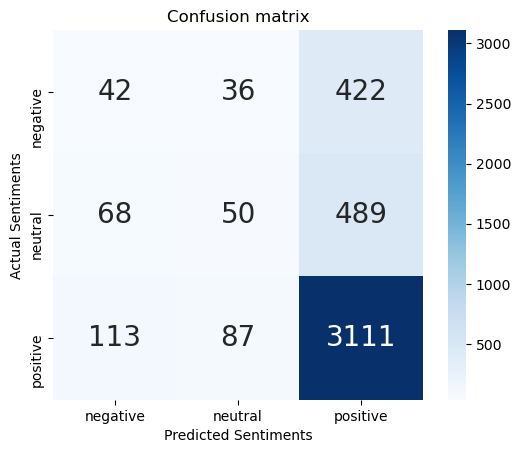

Accuracy: 72.50%
Precision: 64.07%
Recall: 72.50%
F1 Score: 66.67%


In [37]:
# Fitting the second KNN model with second method (CV2)
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv2, y_train)

y_pred_cv2_knn = knn.predict(X_test_cv2)

confusion = confusion_matrix(y_test, y_pred_cv2_knn)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv2_knn)
f1 = f1_score(y_test, y_pred_cv2_knn,average='weighted')
precision = precision_score(y_test, y_pred_cv2_knn,average='weighted')
recall = recall_score(y_test, y_pred_cv2_knn,average='weighted')
cm6 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


In [38]:
# creating a dataframe to compare all metric measurements

results_knn = pd.DataFrame(list(zip(cm5, cm6)))
results_knn = results_knn.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_knn.columns = ['KNN1-CV', 'KNN2-CV-Ngr']
results_knn

results = pd.concat([results, results_knn], axis=1)
results


,LR1-CV,LR2-CV-Ngr,NB1-CV,NB2-CV-Ngr,KNN1-CV,KNN2-CV-Ngr
Accuracy,0.801947,0.808963,0.801947,0.778407,0.748076,0.724989
Precision,0.785143,0.785169,0.795529,0.739731,0.658808,0.640708
Recall,0.801947,0.808963,0.801947,0.778407,0.748076,0.724989
F1 Score,0.792031,0.792637,0.793610,0.714538,0.676148,0.666653


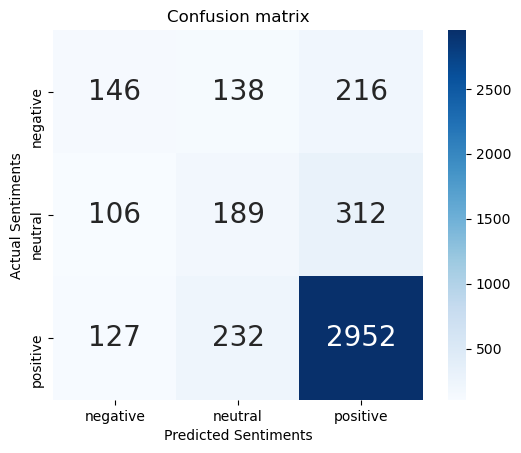

Accuracy: 74.40%
Precision: 72.58%
Recall: 74.40%
F1 Score: 73.37%


In [39]:
# Fit the first Decision Tree model with first method (CV1)
dt = DecisionTreeClassifier()
dt.fit(X_train_cv1, y_train)

y_pred_cv1_dt = dt.predict(X_test_cv1)

confusion = confusion_matrix(y_test, y_pred_cv1_dt)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv1_dt)
f1 = f1_score(y_test, y_pred_cv1_dt,average='weighted')
precision = precision_score(y_test, y_pred_cv1_dt,average='weighted')
recall = recall_score(y_test, y_pred_cv1_dt,average='weighted')
cm7 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


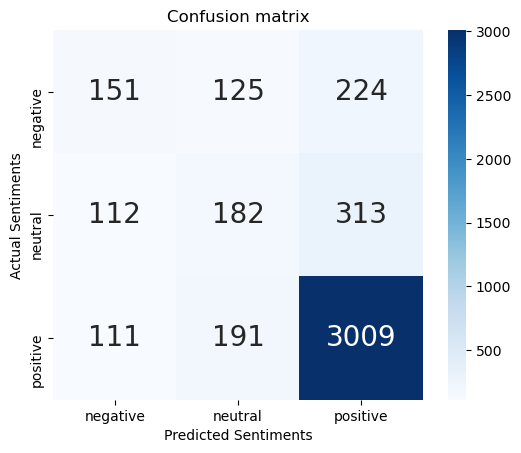

Accuracy: 75.65%
Precision: 73.18%
Recall: 75.65%
F1 Score: 74.21%


In [40]:
# Fit the second Decision Tree model with second method (CV2)
dt = DecisionTreeClassifier()
dt.fit(X_train_cv2, y_train)

y_pred_cv2_dt = dt.predict(X_test_cv2)

confusion = confusion_matrix(y_test, y_pred_cv2_dt)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv2_dt)
f1 = f1_score(y_test, y_pred_cv2_dt,average='weighted')
precision = precision_score(y_test, y_pred_cv2_dt,average='weighted')
recall = recall_score(y_test, y_pred_cv2_dt,average='weighted')
cm8 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


In [41]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log1 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_cv1, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    train_predictions = clf.predict(X_test_cv1)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    print("Accuracy: {:.2%}".format(accuracy))
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1 Score: {:.2%}".format(f1))

    train_predictions = clf.predict_proba(X_test_cv1)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "CountVectorizer",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log1 = log1.append(log_entry)
print("="*30)
round(log1,3)


LogisticRegression
Accuracy: 80.19%
Precision: 78.51%
Recall: 80.19%
F1 Score: 79.20%
Log Loss: 0.52
KNeighborsClassifier
Accuracy: 74.81%
Precision: 65.88%
Recall: 74.81%
F1 Score: 67.61%
Log Loss: 6.4
DecisionTreeClassifier
Accuracy: 74.02%
Precision: 72.11%
Recall: 74.02%
F1 Score: 72.93%
Log Loss: 9.0
RandomForestClassifier
Accuracy: 77.59%
Precision: 73.49%
Recall: 77.59%
F1 Score: 70.79%
Log Loss: 0.51
AdaBoostClassifier
Accuracy: 78.56%
Precision: 74.48%
Recall: 78.56%
F1 Score: 75.26%
Log Loss: 1.1
GradientBoostingClassifier
Accuracy: 79.15%
Precision: 75.44%
Recall: 79.15%
F1 Score: 74.33%
Log Loss: 0.53
MultinomialNB
Accuracy: 80.19%
Precision: 79.55%
Recall: 80.19%
F1 Score: 79.36%
Log Loss: 0.66
BernoulliNB
Accuracy: 79.40%
Precision: 78.06%
Recall: 79.40%
F1 Score: 77.74%
Log Loss: 0.73


,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,CountVectorizer,80.195,78.514,80.195,79.203
0,KNeighborsClassifier,CountVectorizer,74.808,65.881,74.808,67.615
0,DecisionTreeClassifier,CountVectorizer,74.015,72.106,74.015,72.934
0,RandomForestClassifier,CountVectorizer,77.592,73.495,77.592,70.793
0,AdaBoostClassifier,CountVectorizer,78.565,74.478,78.565,75.258
0,GradientBoostingClassifier,CountVectorizer,79.153,75.439,79.153,74.333
0,MultinomialNB,CountVectorizer,80.195,79.553,80.195,79.361
0,BernoulliNB,CountVectorizer,79.402,78.058,79.402,77.736


In [42]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log2 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_cv2, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    train_predictions = clf.predict(X_test_cv2)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    print("Accuracy: {:.2%}".format(accuracy))
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1 Score: {:.2%}".format(f1))

    train_predictions = clf.predict_proba(X_test_cv2)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "N-grams",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log2 = log2.append(log_entry)
print("="*30)
round(log2,3)

LogisticRegression
Accuracy: 80.90%
Precision: 78.52%
Recall: 80.90%
F1 Score: 79.26%
Log Loss: 0.49
KNeighborsClassifier
Accuracy: 72.50%
Precision: 64.07%
Recall: 72.50%
F1 Score: 66.67%
Log Loss: 4.4
DecisionTreeClassifier
Accuracy: 74.83%
Precision: 72.48%
Recall: 74.83%
F1 Score: 73.48%
Log Loss: 8.7
RandomForestClassifier
Accuracy: 76.39%
Precision: 73.04%
Recall: 76.39%
F1 Score: 67.84%
Log Loss: 0.55
AdaBoostClassifier
Accuracy: 78.95%
Precision: 75.20%
Recall: 78.95%
F1 Score: 75.46%
Log Loss: 1.1
GradientBoostingClassifier
Accuracy: 79.09%
Precision: 75.36%
Recall: 79.09%
F1 Score: 74.27%
Log Loss: 0.53
MultinomialNB
Accuracy: 77.84%
Precision: 73.97%
Recall: 77.84%
F1 Score: 71.45%
Log Loss: 2.0
BernoulliNB
Accuracy: 74.94%
Precision: 56.17%
Recall: 74.94%
F1 Score: 64.21%
Log Loss: 8.0


,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,N-grams,80.896,78.517,80.896,79.264
0,KNeighborsClassifier,N-grams,72.499,64.071,72.499,66.665
0,DecisionTreeClassifier,N-grams,74.830,72.480,74.830,73.482
0,RandomForestClassifier,N-grams,76.392,73.039,76.392,67.836
0,AdaBoostClassifier,N-grams,78.950,75.202,78.950,75.460
0,GradientBoostingClassifier,N-grams,79.086,75.355,79.086,74.275
0,MultinomialNB,N-grams,77.841,73.973,77.841,71.454
0,BernoulliNB,N-grams,74.943,56.165,74.943,64.210


In [43]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

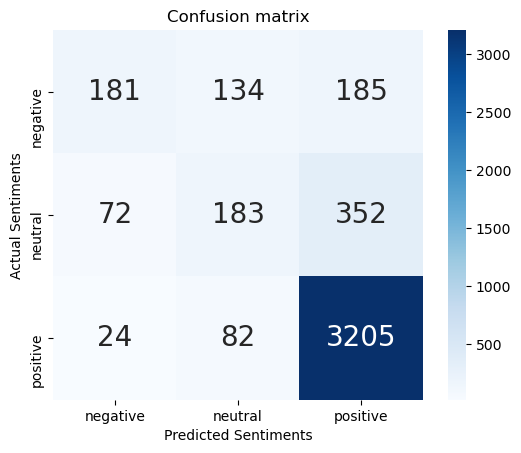

In [44]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
# Here's the heat map for the first Naive Bayes model
confusion = confusion_matrix(y_test, y_pred_tfidf1_lr)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()


In [45]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log3 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_tfidf1, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    train_predictions = clf.predict(X_test_tfidf1)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    print("Accuracy: {:.2%}".format(accuracy))
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1 Score: {:.2%}".format(f1))

    train_predictions = clf.predict_proba(X_test_cv1)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "TF-IDF",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log3 = log3.append(log_entry)
print("="*30)
round(log3,3)

LogisticRegression
Accuracy: 80.78%
Precision: 77.89%
Recall: 80.78%
F1 Score: 78.38%
Log Loss: 1.0
KNeighborsClassifier
Accuracy: 75.12%
Precision: 69.99%
Recall: 75.12%
F1 Score: 71.81%
Log Loss: 5.6
DecisionTreeClassifier
Accuracy: 72.63%
Precision: 71.34%
Recall: 72.63%
F1 Score: 71.92%
Log Loss: 1.2e+01
RandomForestClassifier
Accuracy: 78.02%
Precision: 73.76%
Recall: 78.02%
F1 Score: 71.83%
Log Loss: 0.55
AdaBoostClassifier
Accuracy: 78.38%
Precision: 74.39%
Recall: 78.38%
F1 Score: 74.55%
Log Loss: 1.0
GradientBoostingClassifier
Accuracy: 78.97%
Precision: 74.91%
Recall: 78.97%
F1 Score: 74.24%
Log Loss: 0.54
MultinomialNB
Accuracy: 75.35%
Precision: 72.39%
Recall: 75.35%
F1 Score: 65.39%
Log Loss: 1.6
BernoulliNB
Accuracy: 79.40%
Precision: 78.06%
Recall: 79.40%
F1 Score: 77.74%
Log Loss: 0.73


,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,TF-IDF,80.783,77.885,80.783,78.382
0,KNeighborsClassifier,TF-IDF,75.124,69.990,75.124,71.809
0,DecisionTreeClassifier,TF-IDF,72.635,71.339,72.635,71.922
0,RandomForestClassifier,TF-IDF,78.022,73.762,78.022,71.829
0,AdaBoostClassifier,TF-IDF,78.384,74.390,78.384,74.554
0,GradientBoostingClassifier,TF-IDF,78.972,74.907,78.972,74.239
0,MultinomialNB,TF-IDF,75.351,72.387,75.351,65.389
0,BernoulliNB,TF-IDF,79.402,78.058,79.402,77.736


In [46]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log4 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_tfidf2, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    train_predictions = clf.predict(X_test_tfidf2)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    print("Accuracy: {:.2%}".format(accuracy))
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1 Score: {:.2%}".format(f1))

    train_predictions = clf.predict_proba(X_test_cv2)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "TF-IDF, N-grams",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log4 = log4.append(log_entry)
print("="*30)
round(log4,3)


LogisticRegression
Accuracy: 79.65%
Precision: 76.32%
Recall: 79.65%
F1 Score: 75.96%
Log Loss: 1.3
KNeighborsClassifier
Accuracy: 75.83%
Precision: 69.74%
Recall: 75.83%
F1 Score: 71.37%
Log Loss: 5.6
DecisionTreeClassifier
Accuracy: 73.47%
Precision: 71.38%
Recall: 73.47%
F1 Score: 72.31%
Log Loss: 9.3
RandomForestClassifier
Accuracy: 75.94%
Precision: 73.52%
Recall: 75.94%
F1 Score: 66.75%
Log Loss: 0.55
AdaBoostClassifier
Accuracy: 78.59%
Precision: 74.54%
Recall: 78.59%
F1 Score: 74.60%
Log Loss: 1.0
GradientBoostingClassifier
Accuracy: 78.84%
Precision: 75.20%
Recall: 78.84%
F1 Score: 73.73%
Log Loss: 0.55
MultinomialNB
Accuracy: 74.94%
Precision: 56.17%
Recall: 74.94%
F1 Score: 64.21%
Log Loss: 4.7
BernoulliNB
Accuracy: 74.94%
Precision: 56.17%
Recall: 74.94%
F1 Score: 64.21%
Log Loss: 8.0


,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,"TF-IDF, N-grams",79.651,76.319,79.651,75.956
0,KNeighborsClassifier,"TF-IDF, N-grams",75.826,69.742,75.826,71.375
0,DecisionTreeClassifier,"TF-IDF, N-grams",73.472,71.383,73.472,72.306
0,RandomForestClassifier,"TF-IDF, N-grams",75.939,73.520,75.939,66.750
0,AdaBoostClassifier,"TF-IDF, N-grams",78.588,74.537,78.588,74.597
0,GradientBoostingClassifier,"TF-IDF, N-grams",78.837,75.195,78.837,73.728
0,MultinomialNB,"TF-IDF, N-grams",74.943,56.165,74.943,64.210
0,BernoulliNB,"TF-IDF, N-grams",74.943,56.165,74.943,64.210


In [47]:
# Putting all error metrics into a dataframe for comparison

result = pd.concat([log1,log2,log3,log4],axis=0)
result


,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,CountVectorizer,80.194658,78.514314,80.194658,79.203081
0,KNeighborsClassifier,CountVectorizer,74.807605,65.880754,74.807605,67.614786
0,DecisionTreeClassifier,CountVectorizer,74.015392,72.106067,74.015392,72.934111
0,RandomForestClassifier,CountVectorizer,77.591670,73.494798,77.591670,70.793272
0,AdaBoostClassifier,CountVectorizer,78.564962,74.478414,78.564962,75.257979
0,GradientBoostingClassifier,CountVectorizer,79.153463,75.438748,79.153463,74.332958
0,MultinomialNB,CountVectorizer,80.194658,79.552926,80.194658,79.361007
0,BernoulliNB,CountVectorizer,79.402445,78.058006,79.402445,77.736260
0,LogisticRegression,N-grams,80.896333,78.516882,80.896333,79.263698
0,KNeighborsClassifier,N-grams,72.498868,64.070811,72.498868,66.665290


In [48]:
# sort by accuracy score
result.sort_values("Accuracy",ascending=False)


,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,N-grams,80.896333,78.516882,80.896333,79.263698
0,LogisticRegression,TF-IDF,80.783160,77.885116,80.783160,78.382315
0,MultinomialNB,CountVectorizer,80.194658,79.552926,80.194658,79.361007
0,LogisticRegression,CountVectorizer,80.194658,78.514314,80.194658,79.203081
0,LogisticRegression,"TF-IDF, N-grams",79.651426,76.319077,79.651426,75.956295
0,BernoulliNB,TF-IDF,79.402445,78.058006,79.402445,77.736260
0,BernoulliNB,CountVectorizer,79.402445,78.058006,79.402445,77.736260
0,GradientBoostingClassifier,CountVectorizer,79.153463,75.438748,79.153463,74.332958
0,GradientBoostingClassifier,N-grams,79.085559,75.355097,79.085559,74.274593
0,GradientBoostingClassifier,TF-IDF,78.972386,74.907436,78.972386,74.238655
